In [1]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import config as cfg
import csv
import time
import math
import random
import cv2
from datetime import datetime
from tensorflow.keras import backend as K
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

DEB_MSG = True

Python version :  3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]
TensorFlow version :  1.15.0
Keras version :  2.3.1


Using TensorFlow backend.


In [2]:
# 데이터 불러오기

xs = []
ys = []

#read data.csv
increased_path = '../dataset/20200512/3-increased'
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # print(row[0], row[1])
        xs.append(increased_path + '/' + row[0])
        ys.append(int(row[1]))

        
        
increased_path = '../dataset/20200513/3-increased'
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # print(row[0], row[1])
        xs.append(increased_path + '/' + row[0])
        ys.append(int(row[1]))
        
#read data.csv
increased_path = '../dataset/training-data-shortcut/3-increased'
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # print(row[0], row[1])
        xs.append(increased_path + '/' + row[0])
        ys.append(int(row[1]))

        
increased_path = '../dataset/training-data-stop/3-increased'
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # print(row[0], row[1])
        xs.append(increased_path + '/' + row[0])
        ys.append(int(row[1]))


#get number of images
num_images = len(xs)
num_train_images = math.floor(num_images * 0.8)
num_val_images = math.floor(num_images * 0.1)
num_test_images = num_images - num_train_images - num_val_images

print('# images : ', num_images)
print('# training images : ', num_train_images)
print('# validation images : ', num_val_images)
print('# test images : ', num_test_images)


#shuffle list of images
c = list(zip(xs, ys))
random.seed(datetime.now())
random.shuffle(c)
random.seed(random.random())
random.shuffle(c)
xs, ys = zip(*c)


if DEB_MSG:
    print()
    print(ys[0])        

# images :  38483
# training images :  30786
# validation images :  3848
# test images :  3849

0


In [3]:
# 파일명을 이용해서 실제 이미지 불러오기
x_train_images = []
y_train_labels = []
x_validation_images = []
y_validation_labels = []
x_test_images = []
y_test_labels = []

for i in range(num_images):
    filepath = xs[i]
    if i < num_train_images:  # training data
        colorIMG = cv2.imread(filepath)[cfg.modelheight:]
        grayIMG = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2GRAY)
        x_train_images.append(cv2.resize(grayIMG, dsize=(cfg.final_width, cfg.final_height)) / 255.0)
        y_train_labels.append([ys[i]])
    elif (i >= num_train_images) and (i < num_train_images + num_val_images):  # validation data
        colorIMG = cv2.imread(filepath)[cfg.modelheight:]
        grayIMG = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2GRAY)
        x_validation_images.append(cv2.resize(grayIMG, dsize=(cfg.final_width, cfg.final_height)) / 255.0)
        y_validation_labels.append([ys[i]])
    else:  # test data
        colorIMG = cv2.imread(filepath)[cfg.modelheight:]
        grayIMG = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2GRAY)
        x_test_images.append(cv2.resize(grayIMG, dsize=(cfg.final_width, cfg.final_height)) / 255.0)
        y_test_labels.append([ys[i]])


if DEB_MSG:        
    print()
    print(y_train_labels[0])        


[0]


(30786, 66, 100)
(30786, 66, 100)


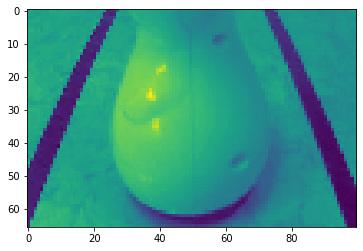

[0]
(3848, 66, 100)


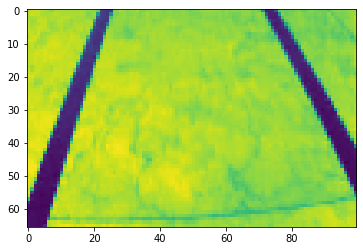

[2]
(3849, 66, 100)


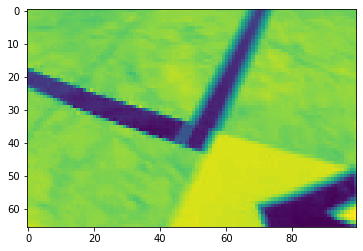

[1]

[0]

[1. 0. 0. 0. 0. 0.]


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

num_classes = cfg.NUM_KEYS

#x_train_images = tf.reshape(x_train_images, [len(x_train_images), cfg.final_height, cfg.final_width, 1])
x_train_images = np.array(x_train_images)
print(x_train_images.shape)
x_train_images.reshape(x_train_images.shape[0], cfg.final_height, cfg.final_width, 1)
print(x_train_images.shape)
plt.imshow(x_train_images[0])
plt.show()
print(y_train_labels[0])

#x_validation_images = tf.reshape(x_validation_images, [len(x_validation_images), cfg.final_height, cfg.final_width, 1])
x_validation_images = np.array(x_validation_images)
x_validation_images.reshape(x_validation_images.shape[0], cfg.final_height, cfg.final_width, 1)
print(x_validation_images.shape)
plt.imshow(x_validation_images[0])
plt.show()
print(y_validation_labels[0])

#x_test_images = tf.reshape(x_test_images, [len(x_test_images), cfg.final_height, cfg.final_width, 1])
x_test_images = np.array(x_test_images)
x_test_images.reshape(x_test_images.shape[0], cfg.final_height, cfg.final_width, 1)
print(x_test_images.shape)
plt.imshow(x_test_images[0])
plt.show()
print(y_test_labels[0])


if DEB_MSG:
    print()
    print(y_train_labels[0])
    
y_train_labels = keras.utils.to_categorical(y_train_labels, num_classes)
y_validation_labels = keras.utils.to_categorical(y_validation_labels, num_classes)
y_test_labels = keras.utils.to_categorical(y_test_labels, num_classes)

if DEB_MSG:
    print()
    print(y_train_labels[0])

In [5]:
#from matplotlib import pyplot as plt
#%matplotlib inline

# 마지막에 color_channel 차원이 추가 되어야 함

print('Before : ', x_train_images.shape)
x_train_images = np.expand_dims(x_train_images, axis=-1)
print('After : ', x_train_images.shape)

print('Before : ', x_validation_images.shape)
x_validation_images = np.expand_dims(x_validation_images, axis=-1)
print('After : ', x_validation_images.shape)

print('Before : ', x_test_images.shape)
x_test_images = np.expand_dims(x_test_images, axis=-1)
print('After : ', x_test_images.shape)

if DEB_MSG:
    print()
    print(y_train_labels[0])

Before :  (30786, 66, 100)
After :  (30786, 66, 100, 1)
Before :  (3848, 66, 100)
After :  (3848, 66, 100, 1)
Before :  (3849, 66, 100)
After :  (3849, 66, 100, 1)

[1. 0. 0. 0. 0. 0.]


In [6]:
print(num_images)  # 전체 데이터 수
print()

print(x_train_images.shape)
print(x_validation_images.shape)
print(x_test_images.shape)
print()

print(len(x_train_images))  # 학습용 이미지 수
print(len(y_train_labels))  # 학습용 레이블 수
print(len(x_validation_images))  # val 이미지 수
print(len(y_validation_labels))  # val 레이블 수
print(len(x_test_images))  # 테스트용 이미지 수
print(len(y_test_labels))  # 테스트용 레이블 수
print()

print(x_train_images[0].shape)  # 학습용 이미지 한개의 차원
#print('label : ', y_train_labels[0].shape)  # 학습용 레이블 한개의 차원
print(y_train_labels[0].shape)  # 학습용 레이블 한개의 차원
print(y_train_labels[0])

print(x_validation_images[0].shape)  # val 이미지 한개의 차원
#print('label : ', y_validation_labels[0].shape)  # val 레이블 한개의 차원
print(y_validation_labels[0].shape)  # val 레이블 한개의 차원
print(y_validation_labels[0])  # val 레이블 한개의 차원

print(x_test_images[0].shape)  # 테스트용 이미지 한개의 차원
#print('label : ', y_test_labels[0].shape)  # 테스트용 레이블 한개의 차원
print(y_test_labels[0].shape)  # 테스트용 레이블 한개의 차원
print(y_test_labels[0])  # 테스트용 레이블 한개의 차원

#input_shape = (cfg.final_height, cfg.final_width, 1)
color_channels = 1
input_shape = (cfg.final_height, cfg.final_width, color_channels)

if K.image_data_format() == "channels_first":
    assert False  # input_shape = (color_channels, height, width)
    
if DEB_MSG:
    print()
    print(y_train_labels[0])    

38483

(30786, 66, 100, 1)
(3848, 66, 100, 1)
(3849, 66, 100, 1)

30786
30786
3848
3848
3849
3849

(66, 100, 1)
(6,)
[1. 0. 0. 0. 0. 0.]
(66, 100, 1)
(6,)
[0. 0. 1. 0. 0. 0.]
(66, 100, 1)
(6,)
[0. 1. 0. 0. 0. 0.]

[1. 0. 0. 0. 0. 0.]


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

if DEB_MSG:
    print()
    print(y_train_labels[0])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 100, 32)       832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
______________________________________

In [9]:
if DEB_MSG:
    print()
    print(y_validation_labels[0])
    print(y_validation_labels.shape)    


[0. 0. 1. 0. 0. 0.]
(3848, 6)


In [10]:
batch_size = 128
#epochs = 10
epochs = 30

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train_images, y_train_labels,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_validation_images, y_validation_labels))

ResourceExhaustedError: OOM when allocating tensor of shape [1000,6] and type float
	 [[node training/Adam/m_6 (defined at /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py:1748) ]]

Original stack trace for 'training/Adam/m_6':
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-765cf6b6b5b0>", line 10, in <module>
    validation_data=(x_validation_images, y_validation_labels))
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1213, in fit
    self._make_train_function()
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 316, in _make_train_function
    loss=self.total_loss)
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/optimizers.py", line 519, in get_updates
    for (i, p) in enumerate(params)]
  File "/usr/local/lib/python3.6/dist-packages/keras/optimizers.py", line 519, in <listcomp>
    for (i, p) in enumerate(params)]
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 963, in zeros
    v = tf.zeros(shape=shape, dtype=dtype, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/array_ops.py", line 2350, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/array_ops.py", line 171, in fill
    result = gen_array_ops.fill(dims, value, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/gen_array_ops.py", line 3602, in fill
    "Fill", dims=dims, value=value, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [16]:
score = model.evaluate(x_test_images, y_test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12033795203911977
Test accuracy: 0.9610787630081177


In [17]:
# save model : https://www.tensorflow.org/tutorials/keras/save_and_load

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('save/my_model.h5')

In [ ]:
# THE END